# Statistics in Data Science


In [1]:
import statistics as stats
import matplotlib.pyplot as plt

data = [10, 12, 11, 13, 12, 11, 100]
print("With outliers: ")
print("Mean : ", stats.mean(data))
print("Median : ", stats.median(data))
print("Mode : ", stats.mean(data))

With outliers: 
Mean :  24.142857142857142
Median :  12
Mode :  24.142857142857142


In [2]:
clean_data = [x for x in data if x<50]
print("Without outliers: ")
print("Mean : ", stats.mean(clean_data))
print("Median : ", stats.median(clean_data))
print("Mode : ", stats.mean(clean_data))

Without outliers: 
Mean :  11.5
Median :  11.5
Mode :  11.5


# Measures of Central Tendency


In [3]:
import seaborn as sns
scores = [75, 80, 85, 90, 95, 100, 85, 85, 90, 95]
print("Mean : ", stats.mean(scores))
print("Median : ", stats.median(scores))
print("Mode : ", stats.mean(scores))

Mean :  88
Median :  87.5
Mode :  88


In [4]:
mean = stats.mean(scores)
median = stats.median(scores)
mode = stats.mode(scores)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


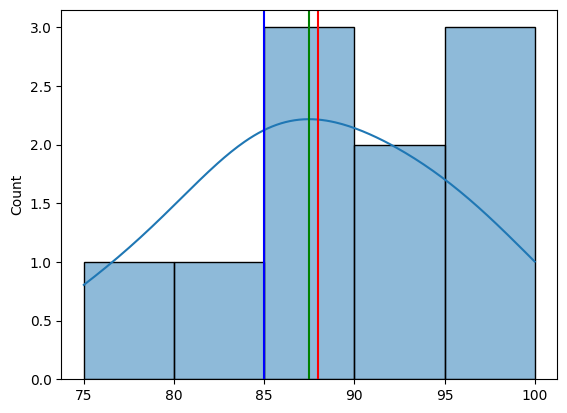

In [5]:
sns.histplot(scores , bins = 5 , kde = True)
plt.axvline(mean, color='red' , label='Mean')
plt.axvline(median, color='green' , label='Median')
plt.axvline(mode, color='blue' , label='Mode')

# Measures of Dispersion


In [6]:
import numpy as np

data = np.array([70, 72, 75, 78, 80, 82, 85, 87, 89, 92])
range = np.max(data) - np.min(data)
interquartile = np.percentile(data,75) - np.percentile(data,25)
variance = np.var(data)
std_dev = np.std(data)
print("Range :", range)
print("Interquartile : ", interquartile)
print("Variance : ", variance)
print("Standard Deviation : ", std_dev)

Range : 22
Interquartile :  10.75
Variance :  48.6
Standard Deviation :  6.971370023173351


{'whiskers': [<matplotlib.lines.Line2D at 0x21212d3a6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21212db7ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21212e1f710>],
 'medians': [<matplotlib.lines.Line2D at 0x21216e32890>],
 'fliers': [<matplotlib.lines.Line2D at 0x21216e33490>],
 'means': []}

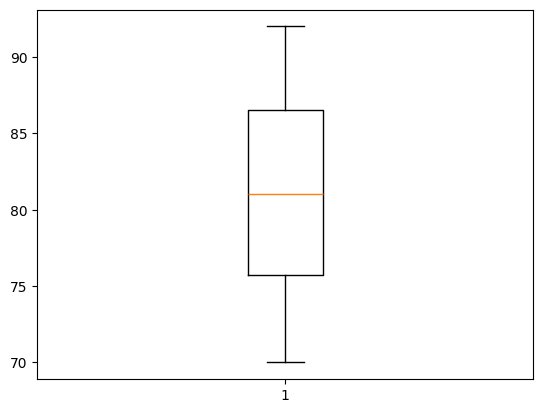

In [7]:
plt.boxplot(data)

# Hypothesis Testing

In [8]:
from scipy.stats import ttest_rel
before = [60, 65, 70, 55, 68, 72, 66]
after = [70, 75, 80, 65, 78, 85, 76]
t_stat , p_val = ttest_rel(before,after)
print("T- Statistics: ", t_stat)
print("P_value : ", p_val)


T- Statistics:  -24.333333333333336
P_value :  3.166640116132521e-07


In [9]:
if p_val < 0.05:
    print("Result is significant")
else:
    print("Result is not significant")

Result is significant


# Types of Error

In [10]:
from scipy.stats import norm
def type_i():
    print("\nType I Error: Rejecting H0 when it's true")
    sample = np.random.normal(50,5,100)
    t_stat , p_val = ttest_rel(sample, np.full(100,50))
    print("P_value : ", p_val)
def type_ii():
    print("\nType II Error: Failing to reject H0 when it's false")
    sample = np.random.normal(55,5,10)
    t_stat , p_val = ttest_rel(sample, np.full(10,50))
    print("P_value : ", p_val)
type_i()
type_ii()


Type I Error: Rejecting H0 when it's true
P_value :  0.9998153292607181

Type II Error: Failing to reject H0 when it's false
P_value :  0.001047076077258261


# Regression Analysis

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [12]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [13]:
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size = 0.3)

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test)

In [16]:
mse = mean_squared_error(y_test,y_pred)

In [17]:
poly = PolynomialFeatures(degree=2)

In [18]:
x_train = poly.fit_transform(X_train)
x_test = poly.transform(X_test)

In [19]:
poly_reg = LinearRegression()

In [20]:
poly_reg.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pre = poly_reg.predict(x_test)

In [22]:
msep = mean_squared_error(y_test,y_pre)

In [26]:
las = Lasso(alpha = 0.2)

In [27]:
las.fit(X_train, y_train)

Lasso(alpha=0.2)

In [29]:
y_pr = las.predict(X_test)

In [30]:
msel = mean_squared_error(y_test,y_pred)

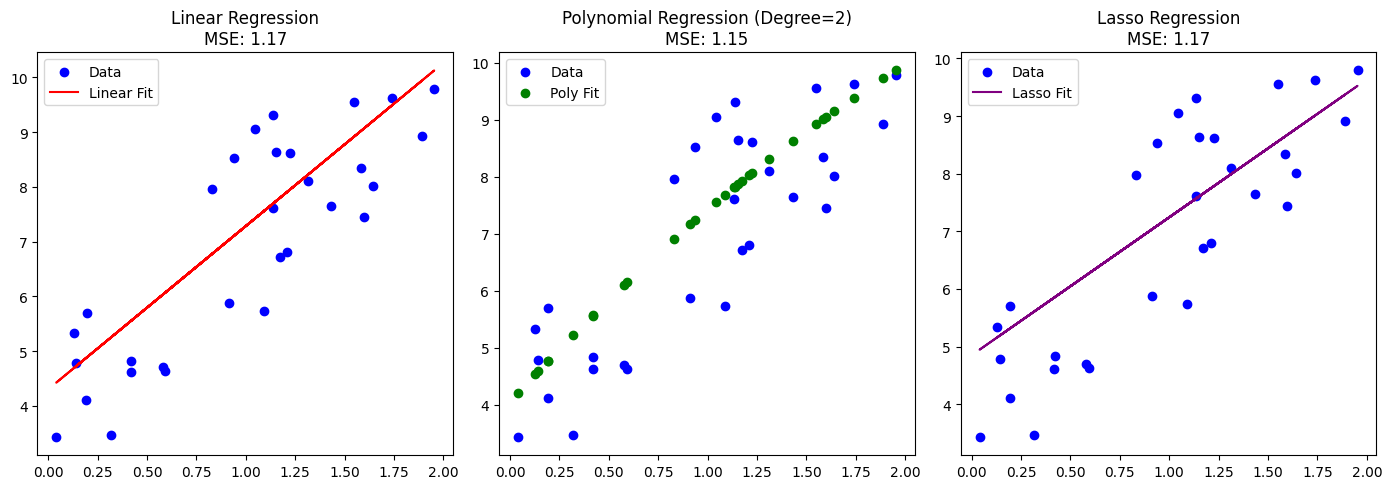

Linear Regression MSE: 1.170
Polynomial Regression MSE: 1.149
Lasso Regression MSE: 1.170


In [33]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Linear Fit')
plt.title(f'Linear Regression\nMSE: {mse:.2f}')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.scatter(X_test, y_pre, color='green', label='Poly Fit')
plt.title(f'Polynomial Regression (Degree=2)\nMSE: {msep:.2f}')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, y_pr, color='purple', label='Lasso Fit')
plt.title(f'Lasso Regression\nMSE: {msel:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Linear Regression MSE: {mse:.3f}")
print(f"Polynomial Regression MSE: {msep:.3f}")
print(f"Lasso Regression MSE: {msel:.3f}")



# Correlation and Regression


In [34]:
np.random.seed
std_hrs = 10 * np.random.rand(50)
marks = 5 * std_hrs + np.random.randn(50) * 5

In [35]:
correlation = np.corrcoef(std_hrs,marks)[0,1]


In [36]:
lrr = LinearRegression()

In [37]:
X = std_hrs.reshape(-1,1)
y = marks.reshape(-1,1)

In [38]:
lrr.fit(X,y)

LinearRegression()

In [39]:
y_predd = lrr.predict(X)

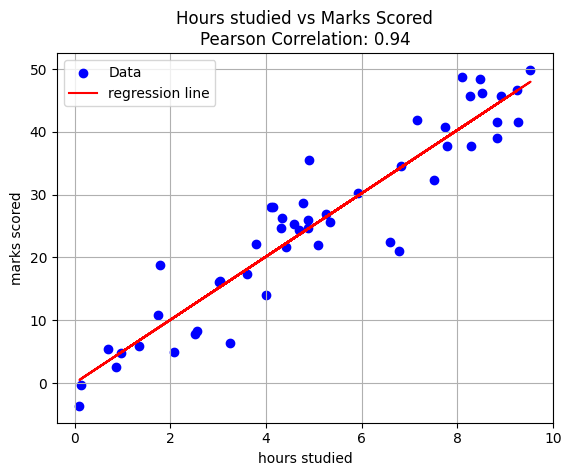

In [43]:
plt.scatter(X,y,color='blue',label='Data')
plt.plot(X,y_predd,color= 'red', label = 'regression line')
plt.title(f"Hours studied vs Marks Scored\nPearson Correlation: {correlation:.2f}")
plt.xlabel("hours studied")
plt.ylabel("marks scored")
plt.legend()
plt.grid(True)

plt.show()

In [47]:
print(f"Pearson Correlation : {correlation:.3f}")

Pearson Correlation : 0.941
